**@author: James V. Talwar**

# Validation Set Analysis: Autoimmune Alleles and Age of Diagnosis

**About:** This notebook provides the code needed to recreate regression analysis in the validation set from the paper [*Autoimmune Alleles at the Major Histocompatibility Locus Modify Melanoma Susceptibility*](https://www.biorxiv.org/content/10.1101/2021.08.12.456166v1.full). In particular this analysis evaluated number of MHC-I autoimmune alleles carried in validation set individuals with fully-resolved HLA types (N=559). 

## 1. Import Packages; Load and Format Data

In [1]:
import pandas as pd
from collections import defaultdict
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import mannwhitneyu
from scipy import stats
import statsmodels.formula.api as smf
from scipy import stats
from statsmodels.stats.multitest import multipletests
from statsmodels.stats.multitest import fdrcorrection

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [2]:
fullyResolvedValidation = pd.read_csv("../GenotypeData/Validation_Fully_Resolved.tsv", sep = "\t", index_col = 0)

## 2. Generate Figure(s) and Run Statistical Analyses

### 2a. Figure 1F Statistical Analyses:

What is the relationship between total number of autoimmune alleles in the validation cohort and age of diagnosis?

In [3]:
valTotalNumAlleles = smf.ols(formula= 'AgeAtDiagnosis ~ NumTotalAIAlleles', data=fullyResolvedValidation).fit() 
summary = valTotalNumAlleles.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,59.3019,0.697,85.125,0.000,57.933,60.670
NumTotalAIAlleles,0.7265,0.742,0.979,0.328,-0.731,2.184


In [4]:
print("The coefficient for the total number of AI alleles is {} with a p-value of {}".format(valTotalNumAlleles.params.NumTotalAIAlleles, valTotalNumAlleles.pvalues.NumTotalAIAlleles))

The coefficient for the total number of AI alleles is 0.7265041520461752 with a p-value of 0.32782676484591255


### 2b. Generate Figure 1F:

In [5]:
#smooth ages for plotting
fullyResolvedValidation["RoundedAge"] = fullyResolvedValidation["AgeAtDiagnosis"].apply(np.round)

(15.0, 100.0)

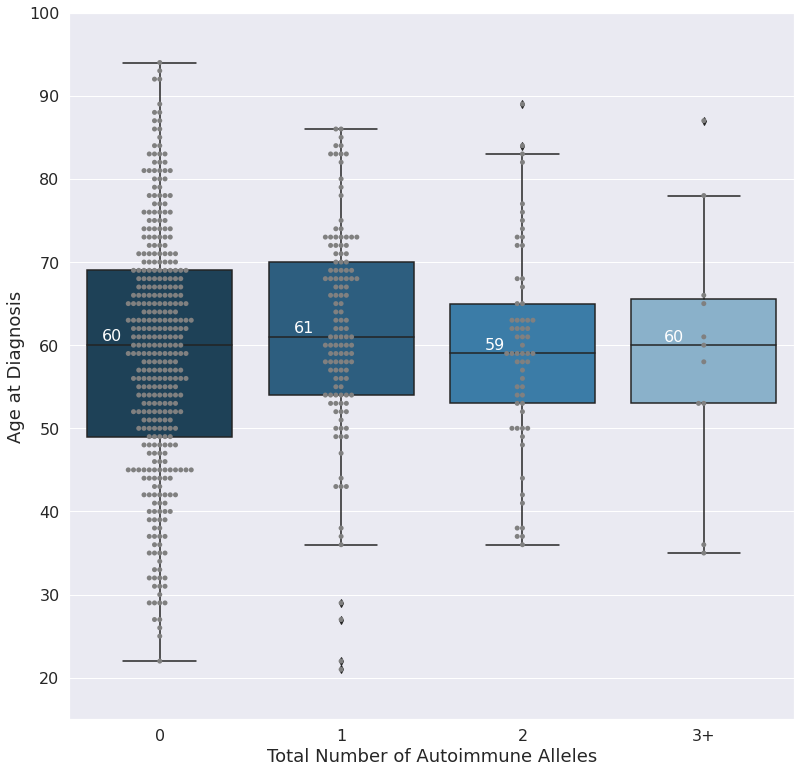

In [6]:
colorPalette = {"0":"#154360" , "1":"#1F618D", "2":"#2980B9" , "3+":"#7FB3D5"}

sns.set(font_scale = 1.1)
plt.figure(figsize=(13,13))
sns.boxplot(data=fullyResolvedValidation, x="PlottingNumTotalAIAlleles", y="RoundedAge", order = ["0", "1", "2", "3+"], palette=colorPalette)
sns.swarmplot(data=fullyResolvedValidation, x="PlottingNumTotalAIAlleles", y="RoundedAge", color = "grey", dodge = True, order = ["0", "1", "2", "3+"])

plt.text(-.32, 60.6, str(int(np.median(fullyResolvedValidation[(fullyResolvedValidation.PlottingNumTotalAIAlleles == "0")]["RoundedAge"]))), color = "white", fontsize = 16)
plt.text(0.74, 61.5, str(int(np.median(fullyResolvedValidation[(fullyResolvedValidation.PlottingNumTotalAIAlleles == "1")]["RoundedAge"]))), color = "white", fontsize = 16)
plt.text(1.79, 59.5, str(int(np.median(fullyResolvedValidation[(fullyResolvedValidation.PlottingNumTotalAIAlleles == "2")]["RoundedAge"]))), color = "white", fontsize = 16)
plt.text(2.78, 60.5, str(int(np.median(fullyResolvedValidation[(fullyResolvedValidation.PlottingNumTotalAIAlleles == "3+")]["RoundedAge"]))), color = "white", fontsize = 16)

plt.xlabel("Total Number of Autoimmune Alleles", fontsize = 18)
plt.ylabel("Age at Diagnosis", fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylim(15,100)